3 pairs found.
🎵 ID       : sample_0000
🏷️ Catégorie: dog
💬 Prompt   : dog


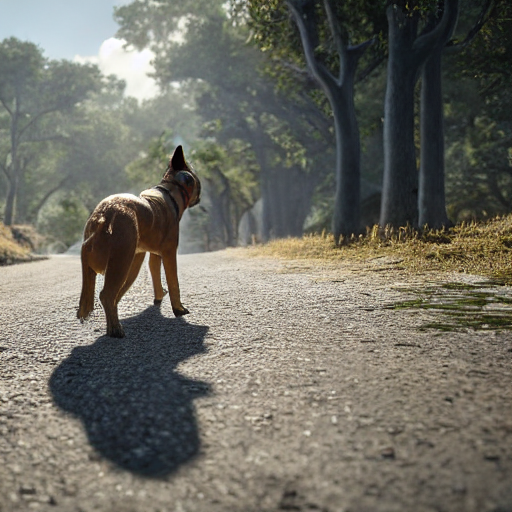

🎵 ID       : sample_0001
🏷️ Catégorie: chirping_birds
💬 Prompt   : chirping birds


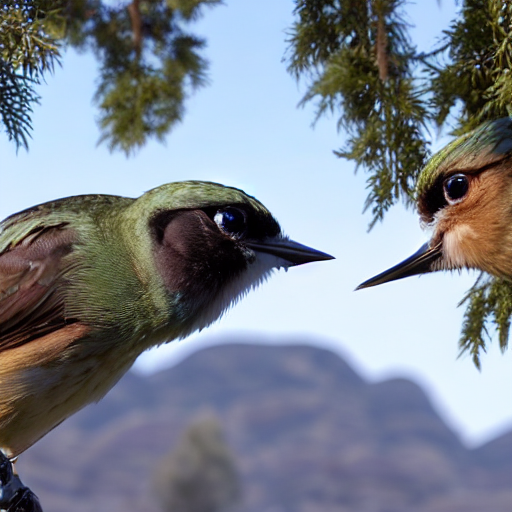

🎵 ID       : sample_0002
🏷️ Catégorie: vacuum_cleaner
💬 Prompt   : vacuum cleaner


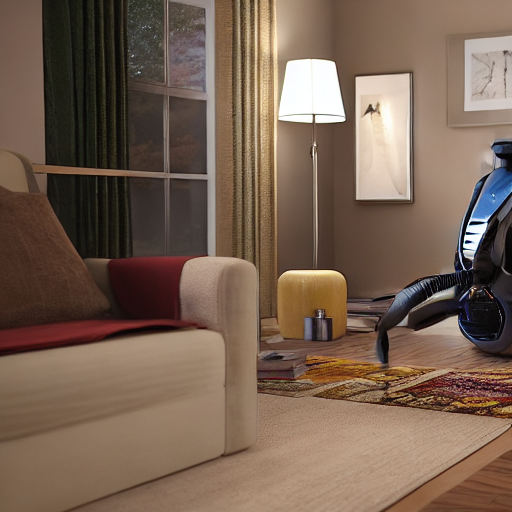

In [2]:
import pandas as pd
import os
import numpy as np
import scipy.io.wavfile
from IPython.display import display, Audio, Image as IPImage

csv_path = "../data/synthetic/metadata.csv"
base_dir = "../data/synthetic"

if not os.path.exists(csv_path):
    print("File not found")
else:
    df = pd.read_csv(csv_path)
    print(f"{len(df)} pairs found.")

    for i in range(min(3, len(df))):
        row = df.iloc[i]
        
        print("=" * 60)
        print(f"🎵 ID       : {row['id']}")
        print(f"🏷️ Catégorie: {row['category']}")
        print(f"💬 Prompt   : {row['caption']}")
        
        img_full_path = os.path.join(base_dir, row['image_path'])
        audio_full_path = os.path.join(base_dir, row['audio_path'])
        
        # Image Display
        if os.path.exists(img_full_path):
            display(IPImage(filename=img_full_path, width=400))
        else:
            print("Missing image")

        # Sound Display
        if os.path.exists(audio_full_path):
            try:
                sr, audio_data = scipy.io.wavfile.read(audio_full_path)
                
                if audio_data.dtype == np.float32 or audio_data.dtype == np.float64:
                    # Normalization for display
                    audio_data = (audio_data * 32767).astype(np.int16)

                display(Audio(data=audio_data, rate=sr))
                
            except Exception as e:
                print(f"error for audio display: {e}")
        else:
            print("Missing audio")